## Лабораторная работа №1 | Вариант 4

Выполнил: Власова Лада М8О-311Б-22

### 1. Numpy

In [1]:
import numpy as np

1. Найти индексы не нулевых элементов массива [1,2,0,0,4,0]

In [2]:
arr = [1, 2, 0, 0, 4, 0]
indices = np.nonzero(arr)[0]
print(indices)

[0 1 4]


2. Создайте единичную матрицу размером 3х3

In [3]:
matrix = np.eye(3)
print(matrix)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


3. Создайте матрицу-шахматную доску 8х8 используя функцию `tile`

In [4]:
pattern = np.array([[0, 1], [1, 0]])
matrix = np.tile(pattern, (4, 4))
print(matrix)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


4. Дан 1D массив, удалите все элементы которые входят в диапазон `[3, 8]` inplace

In [5]:
arr = [0, 4, 4, 2, 1, 4, 8, 7, 10, 15]
arr = np.array(arr)
indices = np.where((arr >= 3) & (arr <= 8))[0]
arr = np.delete(arr, indices)
print(arr)

[ 0  2  1 10 15]


5. Создайте случайный вектор размером 10 элементов и замените максимальный элемент на 0

In [6]:
seed = 42
rng = np.random.default_rng(seed=seed)
arr = rng.integers(1, 100, size=10)
print(arr)
arr[np.argmax(arr)] = 0
print(arr)

[ 9 77 65 44 43 86  9 70 20 10]
[ 9 77 65 44 43  0  9 70 20 10]


6. Как распечатать все значения в массиве?

In [7]:
arr = np.arange(10001)
np.set_printoptions(threshold=np.inf)
print(arr)

[    0     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    70    71
    72    73    74    75    76    77    78    79    80    81    82    83
    84    85    86    87    88    89    90    91    92    93    94    95
    96    97    98    99   100   101   102   103   104   105   106   107
   108   109   110   111   112   113   114   115   116   117   118   119
   120   121   122   123   124   125   126   127   128   129   130   131
   132   133   134   135   136   137   138   139   140   141   142   143
   144   145   146   147   148   149   150   151   152   153   154   155
   156   157   158   159   160   161   162   163   

7. Рассмотрим случайный вектор с формой 100х2, представляющей координаты, и найдем расстояния от точки к точке

In [8]:
points = rng.random((5, 2)) * 100
n = len(points)
distances = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        distances[i, j] = np.sqrt(np.sum((points[i] - points[j])**2))

print(distances)

[[ 0.         66.07981972 65.44004246 12.70447538 35.25846008]
 [66.07981972  0.         41.42169483 53.45991761 31.74289518]
 [65.44004246 41.42169483  0.         54.90925596 37.93899741]
 [12.70447538 53.45991761 54.90925596  0.         22.58257602]
 [35.25846008 31.74289518 37.93899741 22.58257602  0.        ]]


8. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [9]:
arr = np.array([1.0, 2.0, 3.0, 4.0], dtype=np.float32)
print(arr.dtype)
arr = arr.astype(np.int32, copy=False)
print(arr.dtype)

float32
int32


9. Как прочитать заданный файл?
```
1, 2, 3, 4, 5
6,  ,  , 7, 8
 ,  , 9,10,11
```

In [10]:
lines = ["1, 2, 3, 4, 5", "6,  ,  , 7, 8", " ,  , 9,10,11"]
with open('file.txt', 'w') as file:
    file.write('\n'.join(lines))

In [11]:
data = np.genfromtxt('file.txt', delimiter=',', filling_values=np.nan)
print(data)

[[ 1.  2.  3.  4.  5.]
 [ 6. nan nan  7.  8.]
 [nan nan  9. 10. 11.]]


10. Какой эквивалент enumerate для numpy массивов?

In [12]:
arr = np.array([[1, 2, 3], [3, 4, 5]])
for idx, value in np.ndenumerate(arr):
    print(f"{idx} {value}")

(0, 0) 1
(0, 1) 2
(0, 2) 3
(1, 0) 3
(1, 1) 4
(1, 2) 5


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Файл: `russian-housing-market.csv`

```
price_doc - Цена продажи
id - Id транзакции
timestamp - Дата транзакции
full_sq - суммарная площадь в квадратных метрах, включая лоджию, валконы и отдельные нежилые помещения
life_sq - жилая площаль в квадратных метрах, исключая лоджии, балконы и прочие нежилые помещения
floor - для апартаментов, этаж помещения
max_floor - количество этажей в здании
material - материал стен
build_year - год постройки
num_room - количество жилых комнат
kitch_sq - площадь кухни
state - состояние апартаментов
product_type - покупка или инвестиция собственника-арендатора
sub_area - название района
```

In [13]:
import pandas as pd

In [14]:
DATA_PATH = "russian-housing-market.csv"
df = pd.read_csv(DATA_PATH)
df.tail()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,price_doc
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,Investment,Otradnoe,7400000
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,3.0,Investment,Tverskoe,25000000
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,1.0,OwnerOccupier,Poselenie Vnukovskoe,6970959
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,2.0,Investment,Obruchevskoe,13500000
30470,30473,2015-06-30,43,28.0,1.0,9.0,1.0,1968.0,2.0,6.0,2.0,Investment,Novogireevo,5600000


1. Посчитайте количество записей в датасете с отсутствующей информацией о жилой площади жилого помещения

In [15]:
print(df['life_sq'].isnull().sum())

6383


2. Предложите способ заменить отсутствующие значения из пункта 1 и реализуйте его. Способ нужно аргументировать(сказать почему это достаточно хорошее приближение)

Выберем медиану по району, потому что медиана устойчива к выбросам и цена не сильно искажается. В разных районах цены на квартиры отличаются.

In [16]:
median = df.groupby('sub_area')['life_sq'].transform('median')
df['life_sq'] = df['life_sq'].fillna(median)

3. Какие значения имеет 25, 50 и 75 перцентили полной площади помещения

In [17]:
print(df['full_sq'].quantile(0.25))
print(df['full_sq'].quantile(0.50))
print(df['full_sq'].quantile(0.75))

38.0
49.0
63.0


4. Посчитайте среднюю стоимость продажи помещений с общей площадью от 50 до 70 квадратных метров

In [18]:
filtered = df[(df['full_sq'] >= 50) & (df['full_sq'] <= 70)]
print(filtered['price_doc'].mean())

7243041.190994609


5. Какая максимальная этажность здания представлена в датасете

In [19]:
print(df['max_floor'].max())

117.0


6. Выявите район с самым дорогим жильем

In [20]:
print(df.groupby('sub_area')['price_doc'].mean().idxmax())

Hamovniki


7. Посчитайте среднюю стоимость за квадратный метр жилья в Митино(Mitino)

In [21]:
mitino_df = df[df['sub_area'] == 'Mitino']
print((mitino_df['price_doc'] / mitino_df['full_sq']).mean())

171841.39999559196


8. Посчитайте среднюю площадь комнаты в Бибирево

In [22]:
biberievo_df = df[df['sub_area'] == 'Bibirevo']
print((biberievo_df['life_sq'] / biberievo_df['num_room']).mean())

16.06437125748503


9. Проанализируйте есть ли разница в цене между квартирами на 1 и 9 этажах

In [23]:
floor_1 = df[df['floor'] == 1]
floor_9 = df[df['floor'] == 9]
epsilon = 1e-10
res = np.abs(floor_1['price_doc'].mean() - floor_9['price_doc'].mean())
if (res > epsilon):
    print(f"Разница есть: {res}")
else:
  print("Разницы нет")

Разница есть: 1198202.9969607173


10. Найдите минимальную стоимость квартиры с жилой площадью не менее 60 квадратных метров, не менее чем 3мя комнатами и не ниже чем на 5 этаже

In [24]:
filtered_df = df[(df['life_sq'] >= 60) & (df['num_room'] >= 3) & (df['floor'] >= 5)]
print(filtered_df['price_doc'].min())

1000000


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

In [25]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
from matplotlib.dates import YearLocator, DateFormatter
plt.style.use("Solarize_Light2")

1. Как менялась средняя цена квартиры в Нагатинском Затоне(Nagatinski Zaton) с течением времени

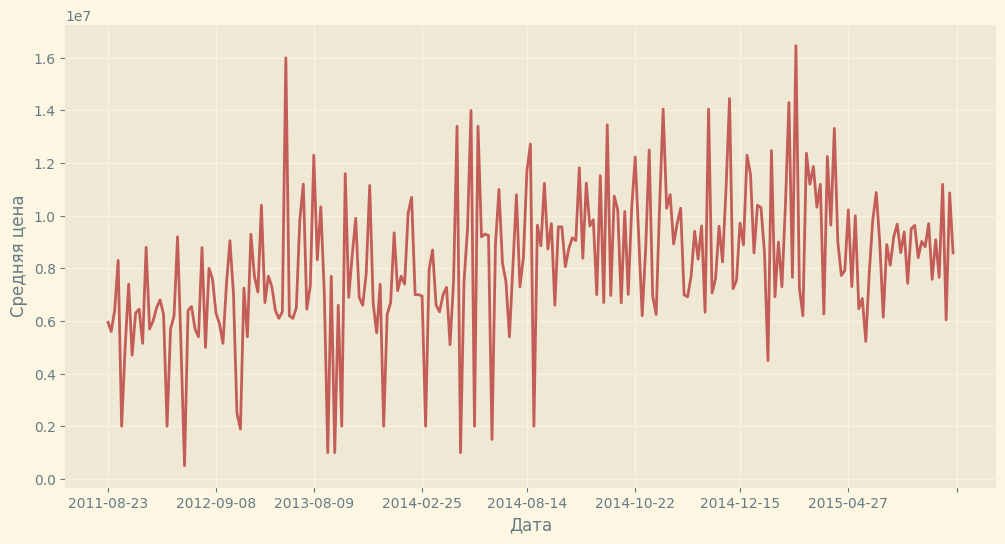

In [26]:
nagatinskij_zaton = df[df['sub_area'] == 'Nagatinskij Zaton']
prices = nagatinskij_zaton.groupby('timestamp')['price_doc'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(prices['timestamp'], prices['price_doc'], color='firebrick', alpha=0.7)

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

plt.xlabel('Дата')
plt.ylabel('Средняя цена')
plt.grid(True, alpha=0.8)
plt.show()

2. Постройте гистограмму распределения цен на квартиры с общей площадью более 50 кв.метров

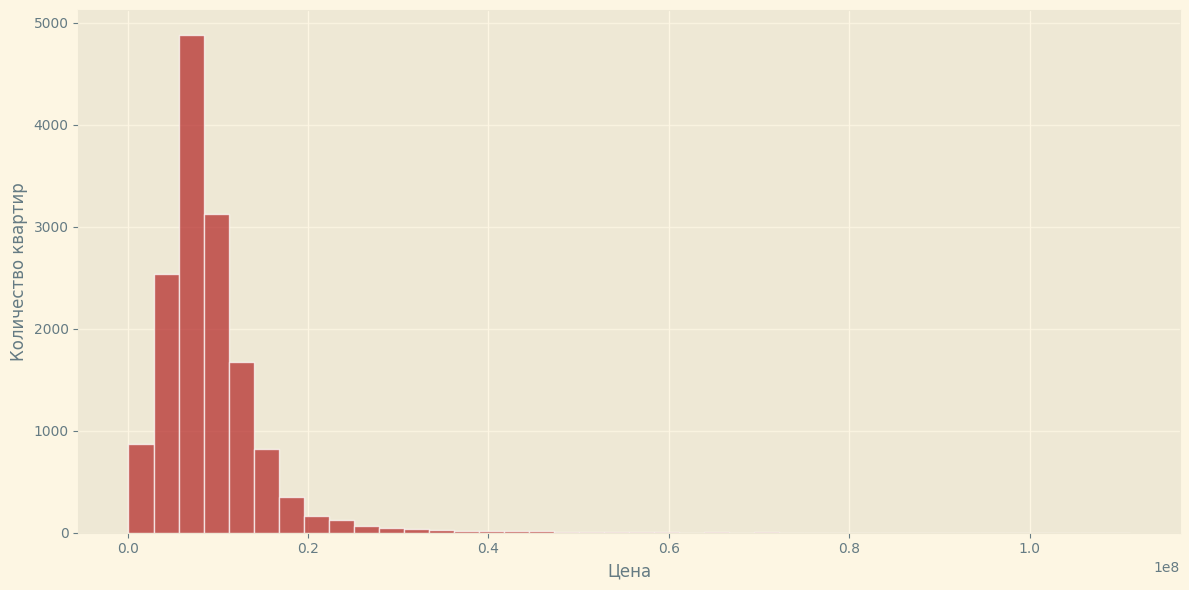

In [28]:
flats = df[df['full_sq'] > 50]

plt.figure(figsize=(12, 6))
plt.hist(flats['price_doc'],
         bins=40,
         color='firebrick',
         alpha=0.7,
         edgecolor='white')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.grid(axis='y', alpha=0.8)

plt.tight_layout()
plt.show()

3. Визуализируйте количество проданных квартир в разных районах

In [29]:
sales = df['sub_area'].value_counts().reset_index()
sales.columns = ['district', 'sales_count']
n = sales.shape[0]
top_districts = sales.sort_values('sales_count', ascending=True).tail(n)

fig = px.bar(top_districts,
             x='sales_count',
             y='district',
             labels={'sales_count': 'Количество продаж', 'district': 'Район'},
             template='ggplot2')
fig.show()

4. Постройте box plot отображающий распределение полных площадей квартир в Басманном районе

In [30]:
basmanny_flats = df[df['sub_area'] == 'Basmannoe']
fig = px.box(
    basmanny_flats,
    y='full_sq',
    labels={'full_sq': 'Полная площадь'},
    template='ggplot2')
fig.show()

5. Визуализируйте зависимость средней стоимости квартир в зависимости от этажа

In [31]:
price_by_floor = df.groupby('floor')['price_doc'].agg(['mean', 'std', 'count']).reset_index()
price_by_floor = price_by_floor.rename(columns={'mean': 'avg_price'})

fig = px.line(
    price_by_floor,
    x='floor',
    y='avg_price',
    labels={'floor': 'Этаж', 'avg_price': 'Средняя цена'},
    template='ggplot2')

fig.show()

6. Покажите как меняется средняя площадь квартир в зависимости от района

In [32]:
area_by_district = df.groupby('sub_area')['full_sq'].mean().reset_index()
area_by_district = area_by_district.sort_values('full_sq', ascending=False)
fig = px.bar(
    area_by_district.head(20),
    x='full_sq',
    y='sub_area',
    labels={'full_sq': 'Средняя площадь', 'sub_area': 'Район'},
    template='ggplot2'
)
fig.show()

7. Постройте график изменения медианной цены на квартиру менее 50 кв. метров за период с 2011 до 2014 года*

\* Задание на доп. балл

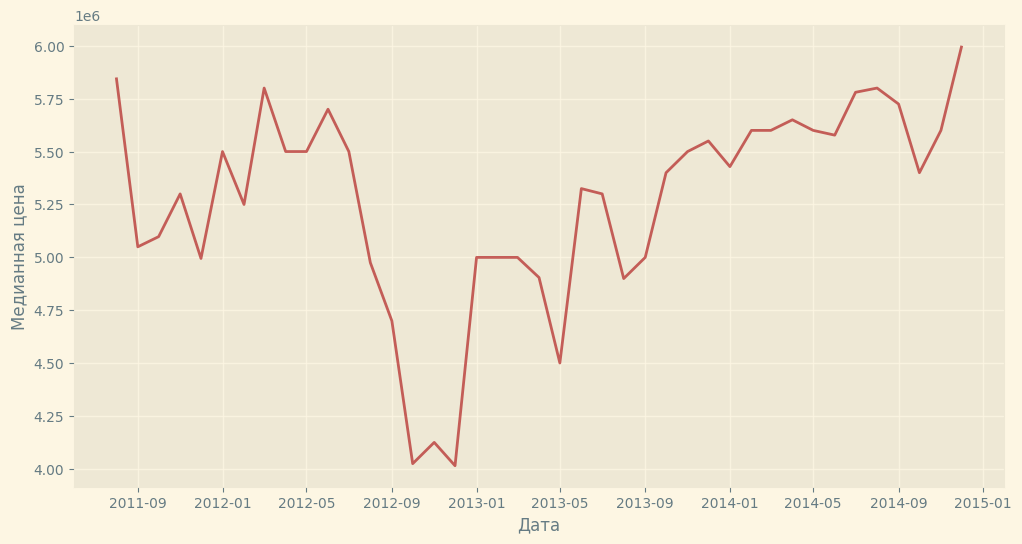

In [33]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

filtered = df[(df['full_sq'] < 50) & (df['timestamp'].dt.year.between(2011, 2014))].copy()
filtered['year_month'] = filtered['timestamp'].dt.to_period('M').dt.to_timestamp()
median_prices = filtered.groupby('year_month')['price_doc'].median().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(median_prices['year_month'],
         median_prices['price_doc'],
         color='firebrick',
         alpha=0.7)

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

plt.xlabel('Дата')
plt.ylabel('Медианная цена')
plt.grid(True, alpha=0.8)

plt.show()